Run Explanation

In [1]:
from proteo.evaluation import run_explainer_train_and_test, compare_top_n, create_protein_plots, cluster_protein_matrix

checkpoint_path /data/lcornelis/outputs/ray_results/TorchTrainer_2024-10-16_16-32-34/model=gat-v4,seed=6021_97_act=tanh,adj_thresh=0.5000,batch_size=32,dropout=0,l1_lambda=0.0000,lr=0.0023,lr_scheduler=LambdaLR,moda_2024-10-16_16-32-35/checkpoint_000050/checkpoint.ckpt
accumulate_grad_batches=1 trainer_accelerator='gpu' act='tanh' log_every_n_steps=10 use_master_nodes=False lr=0.002255069173338685 wandb_offline=False gat_v4_fc_dropout=[0.1, 0.2, 0.5] precision='32-true' gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} sync_batchnorm=False use_progress_bar=True num_nodes_choices=[7258] gat-v4={'hidden_channels': [64, 128], 'heads': [2, 2], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation'], 'fc_dim': [256, 512, 512, 128], 'fc_dropout': 0.2, 'fc_act': 'tanh', 'weight_initializer': 'orthogonal', 'num_layers': None} output_dir='/home/lcornelis/code/proteo/outputs' lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'ExponentialL

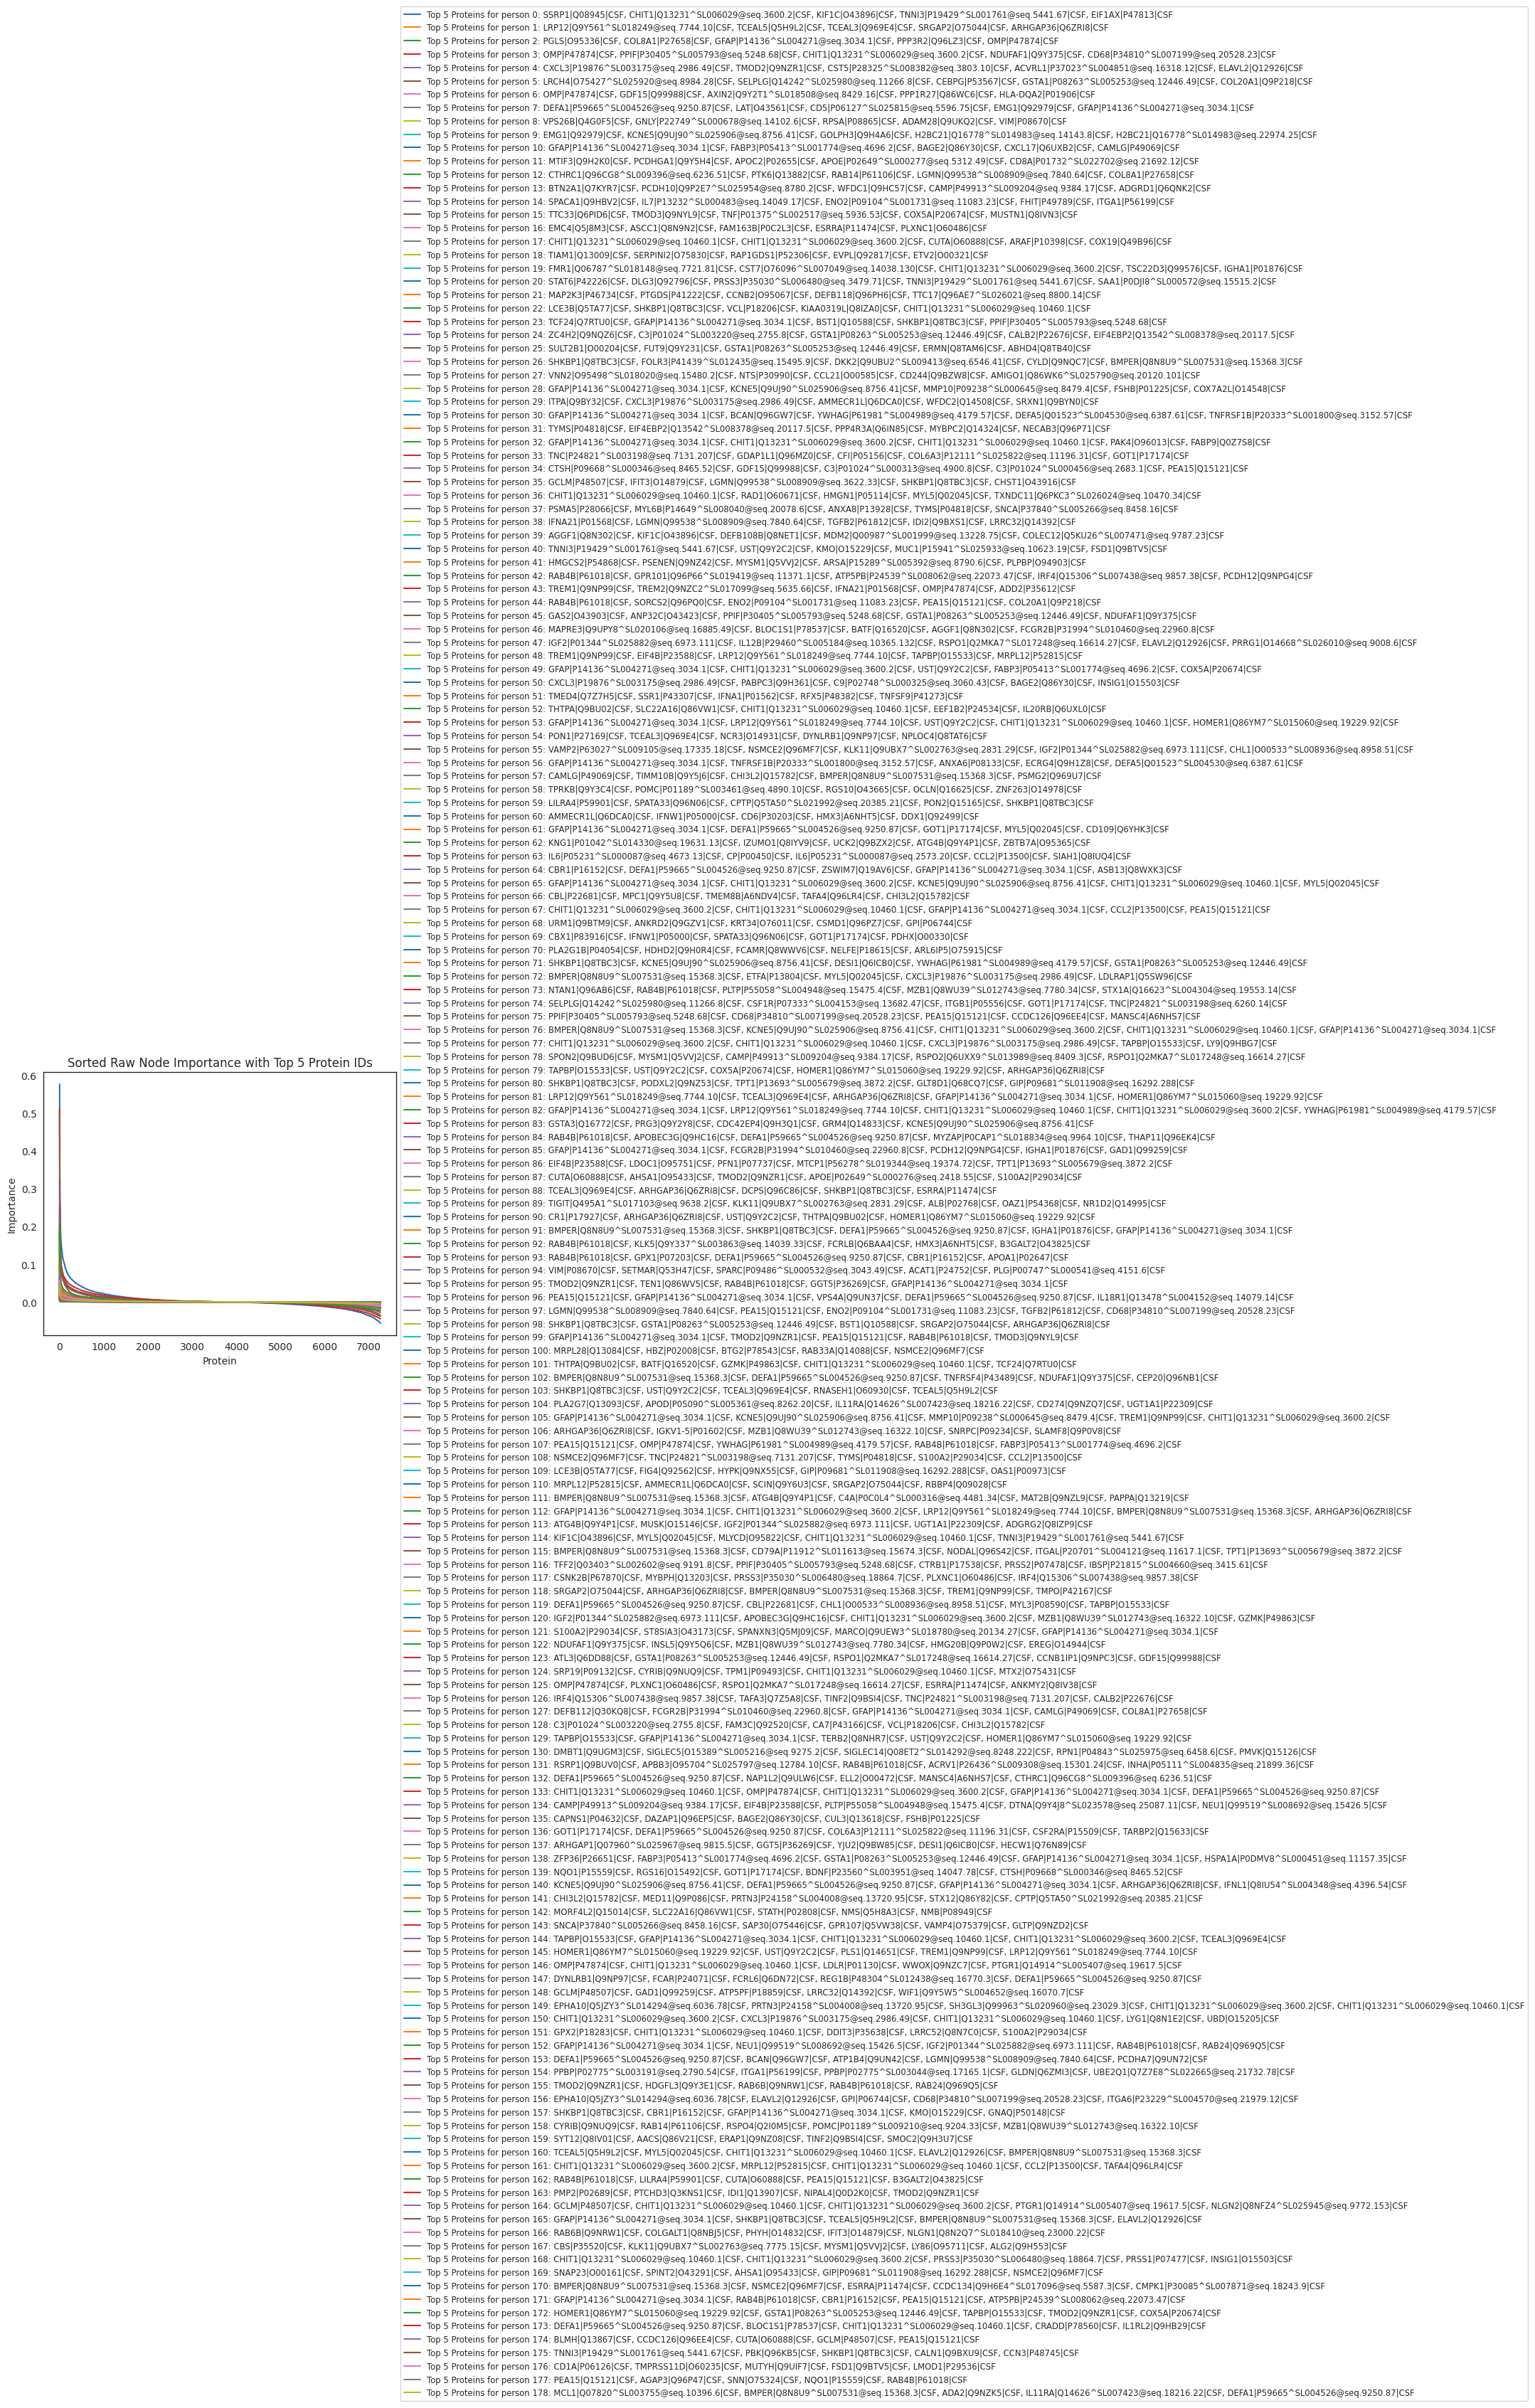

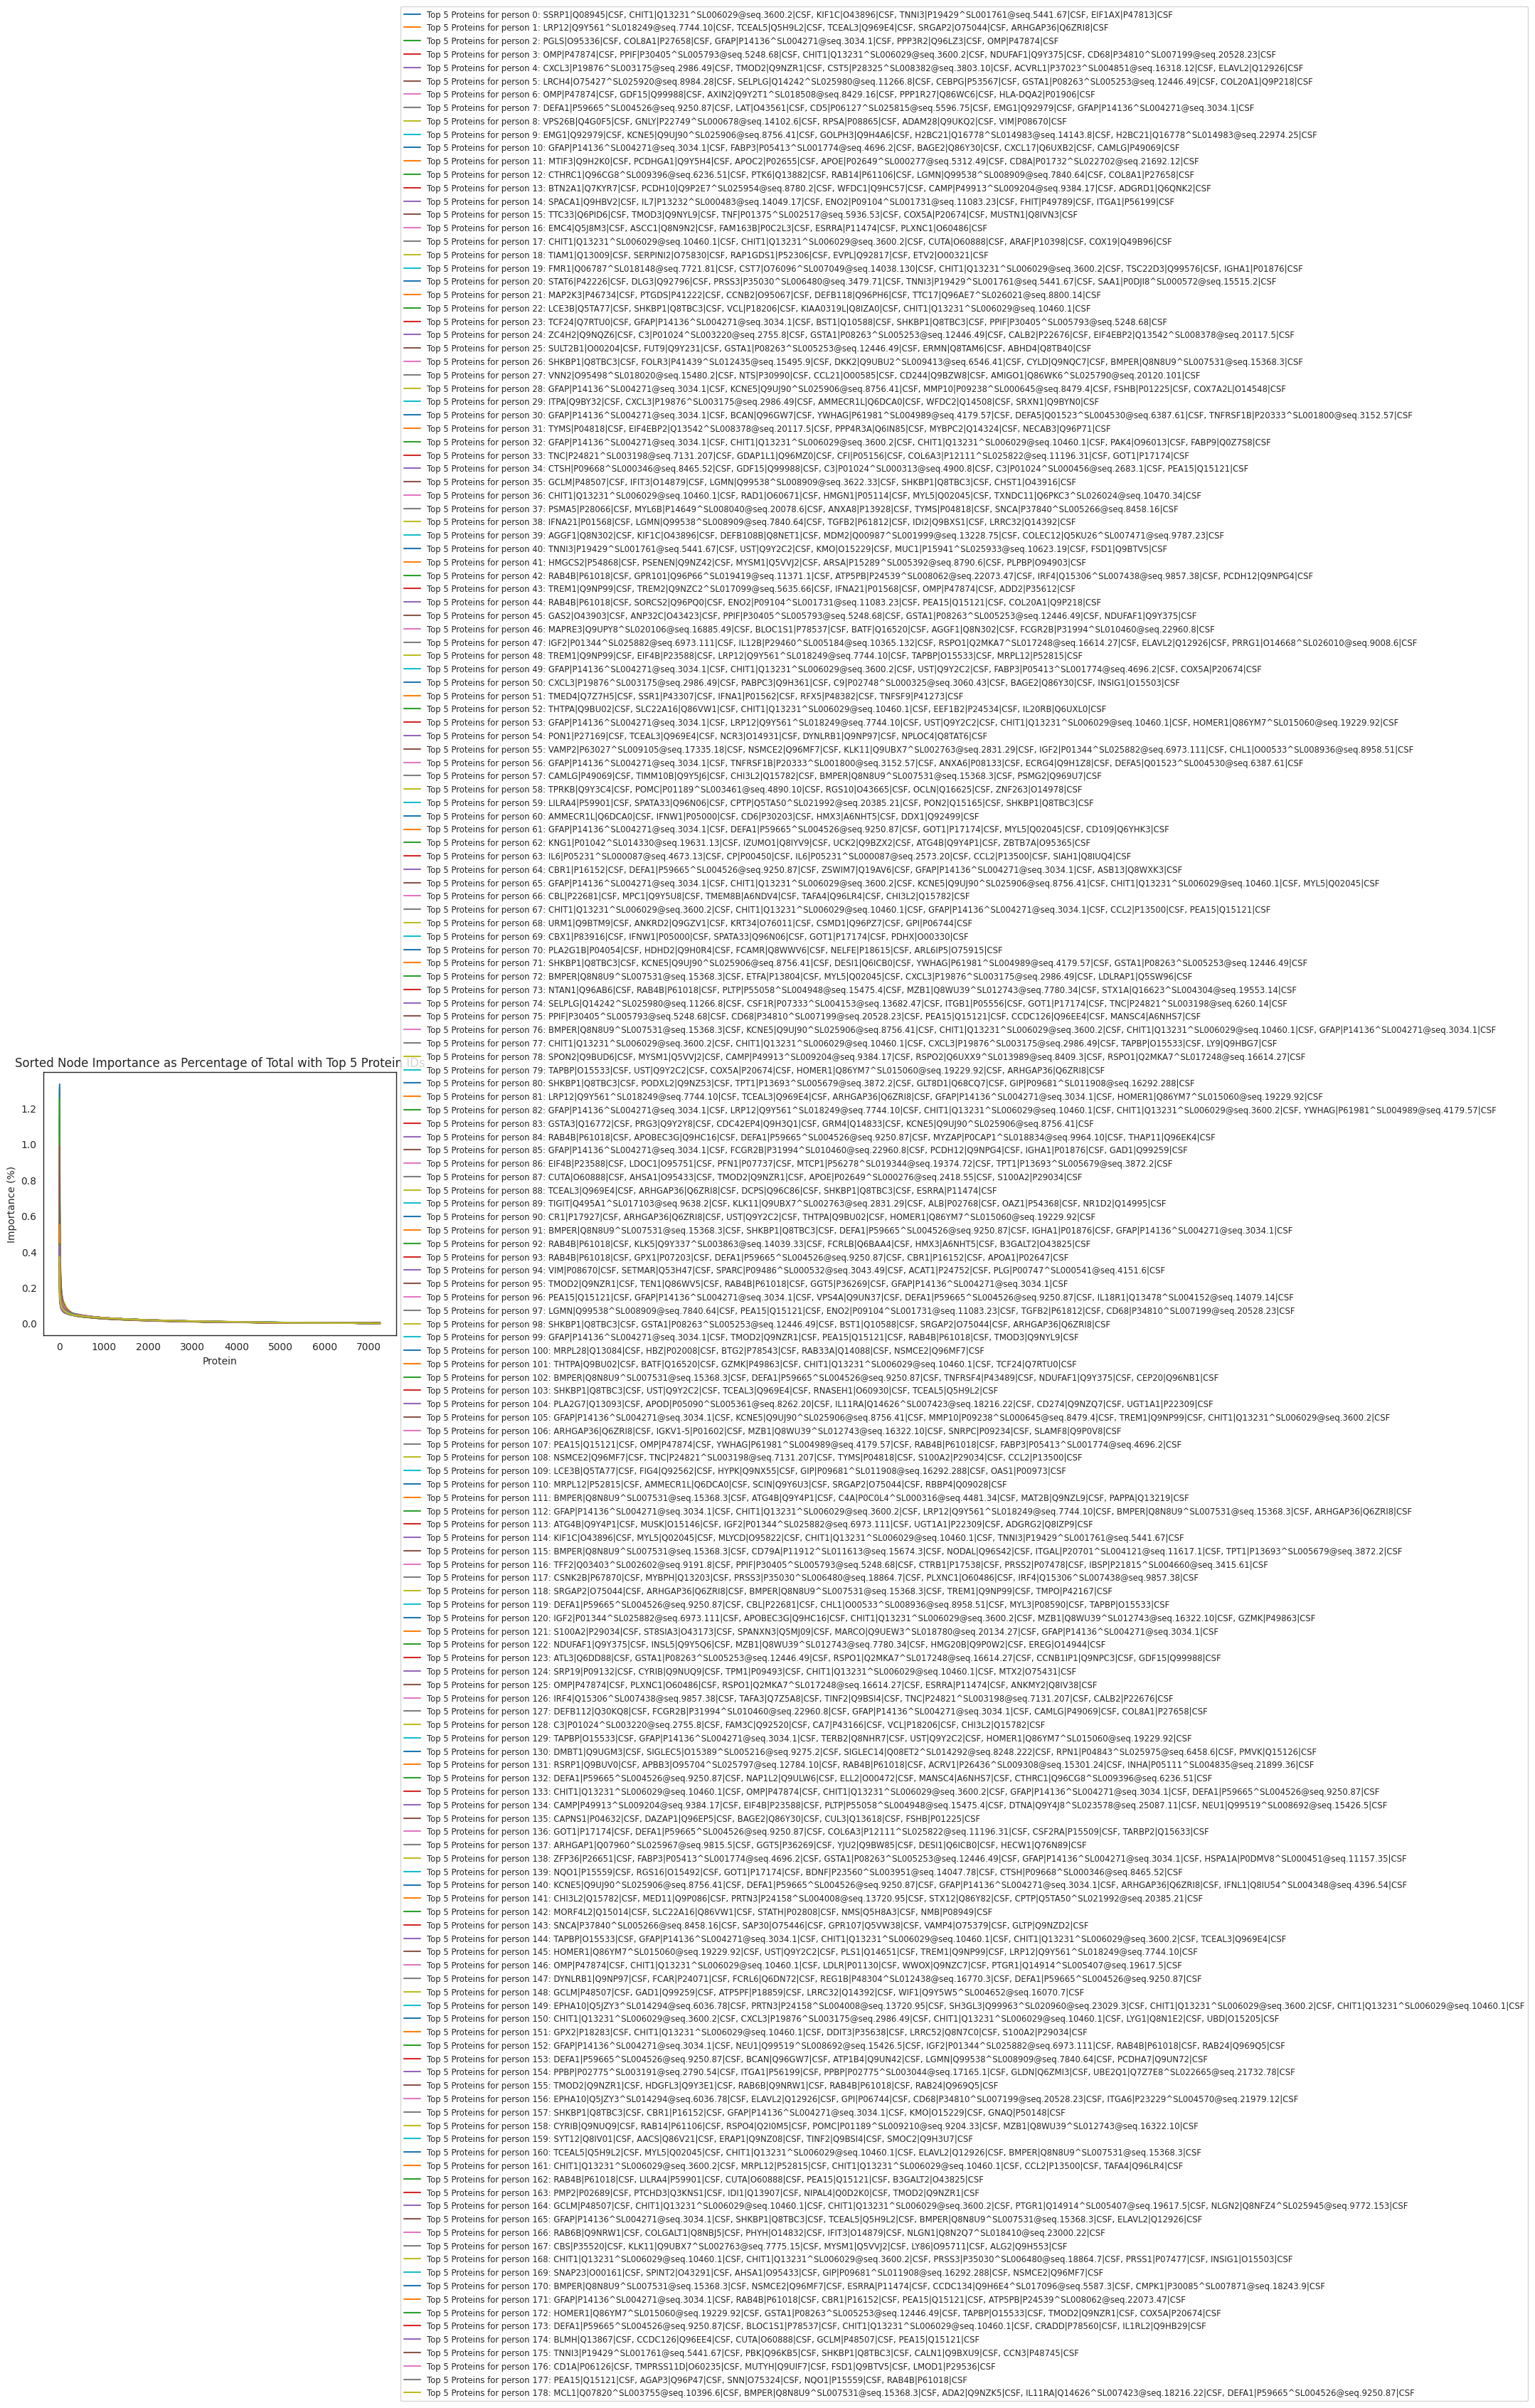

n_people = 45
n_nodes = 7258


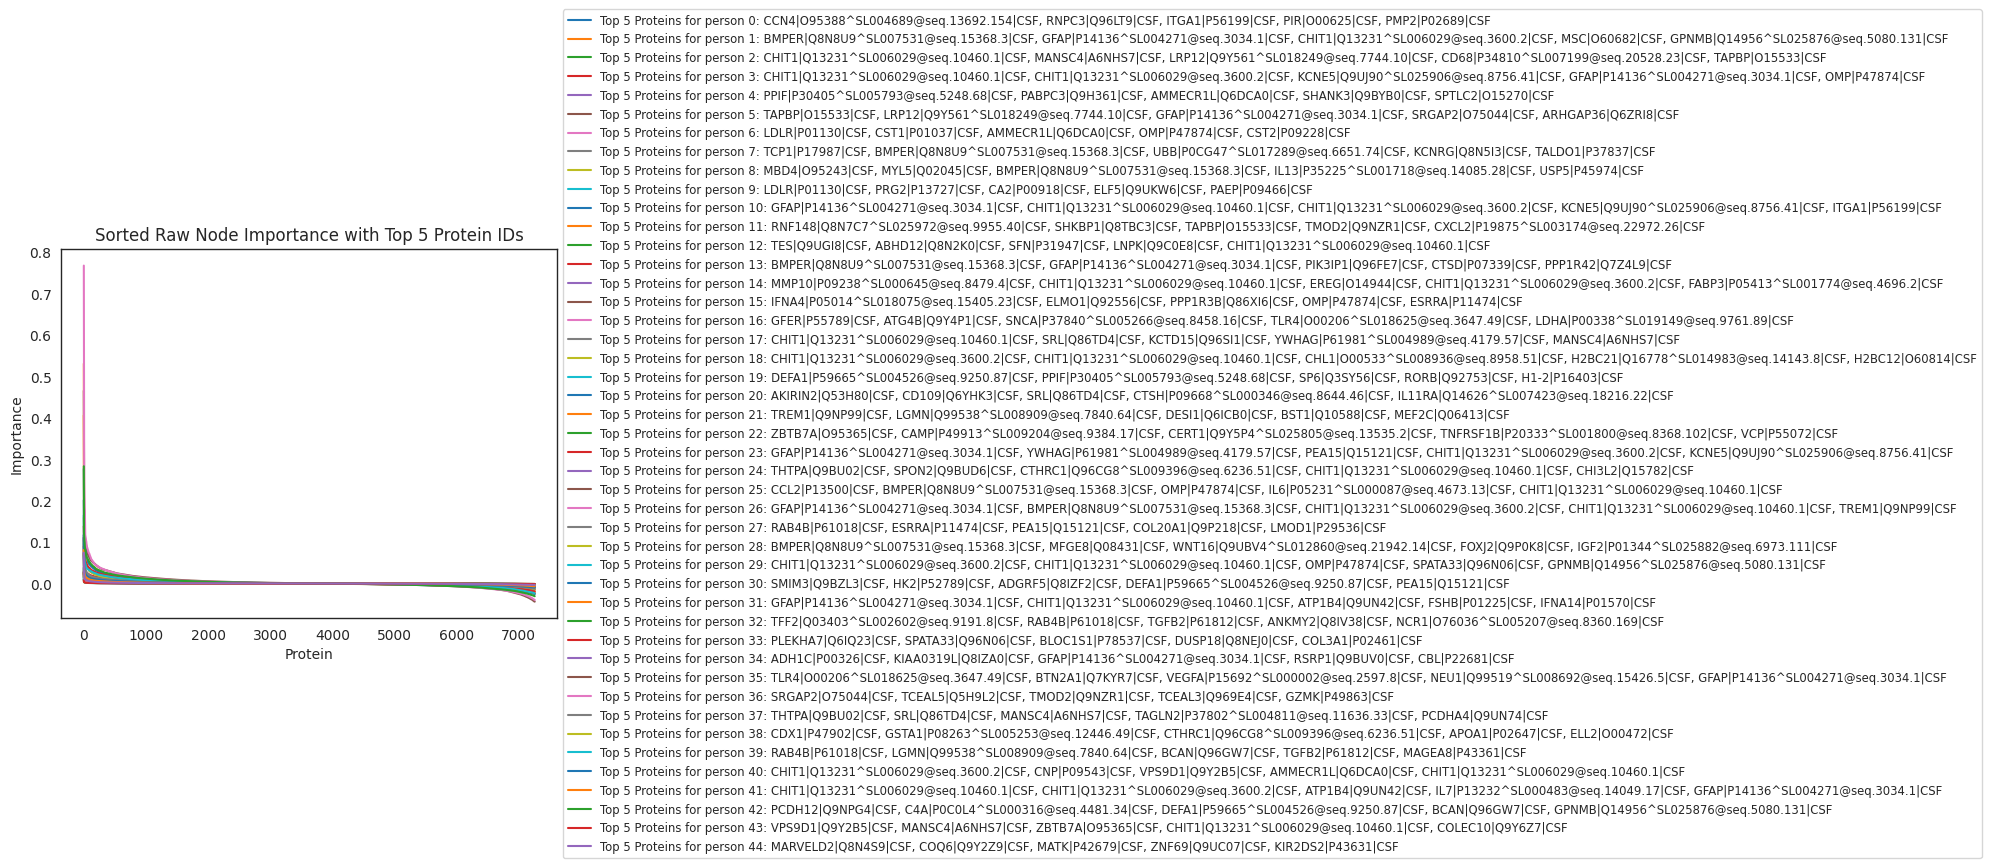

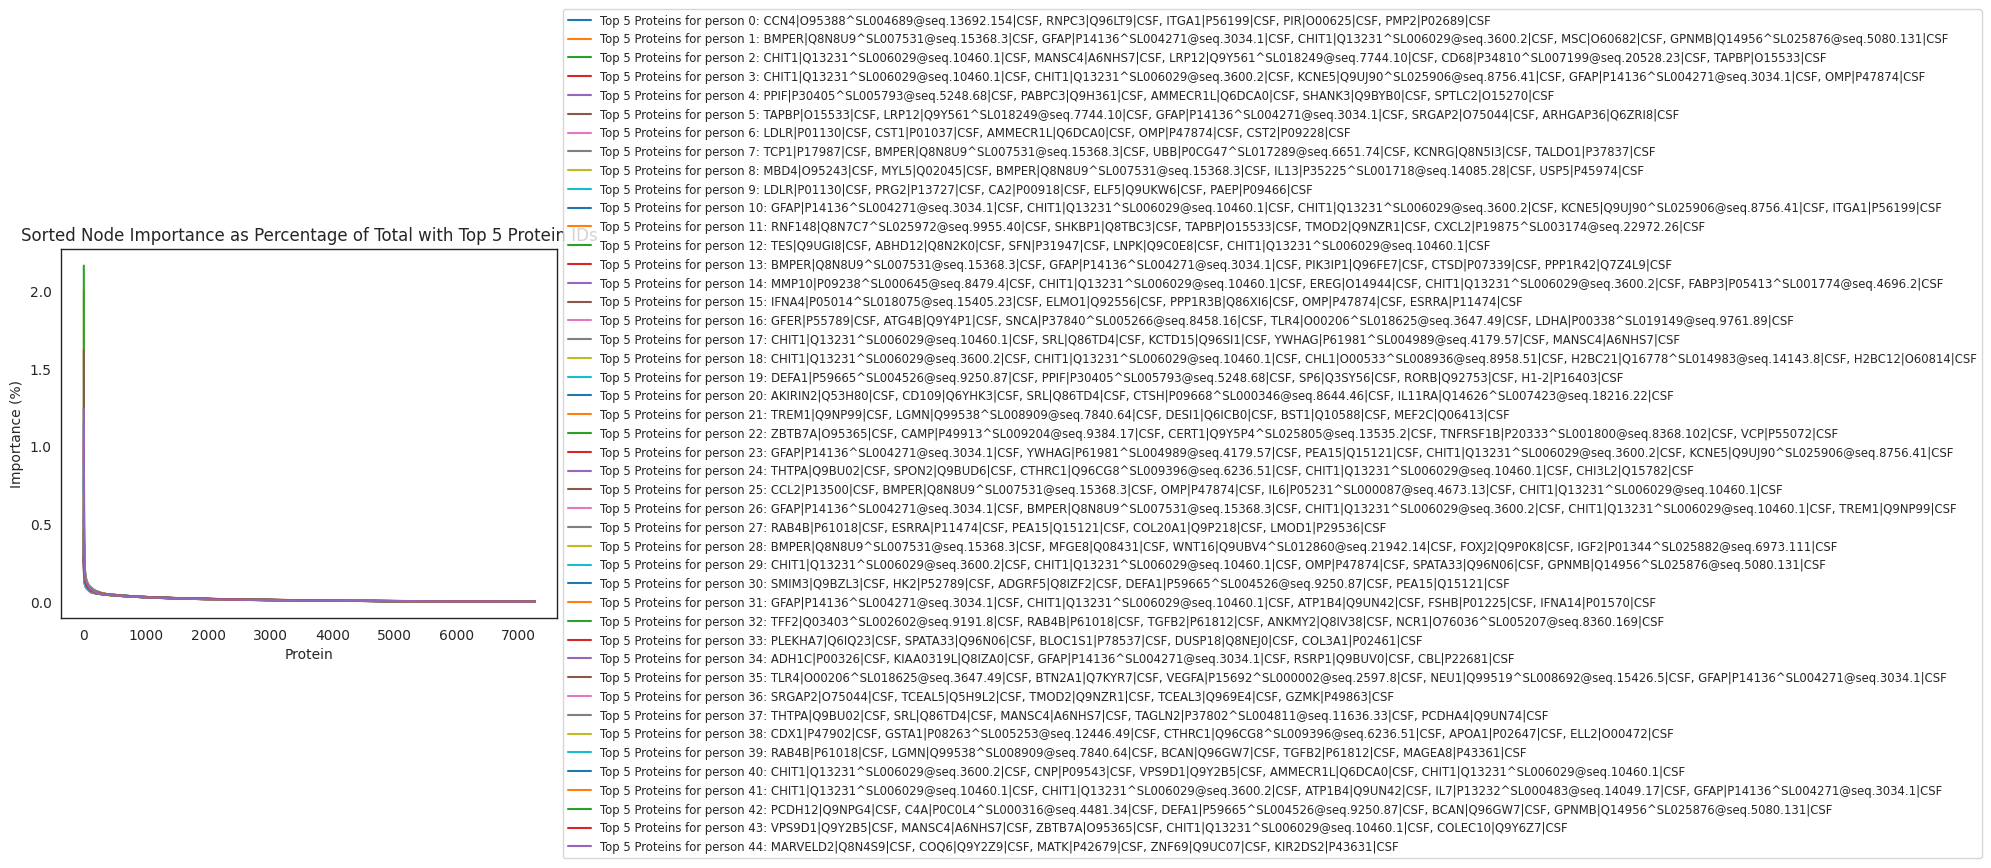

all_explanations shape (224, 7258)


ValueError: not enough values to unpack (expected 7, got 6)

In [2]:
#Best models, sex specific adj with no age in fc
model1 = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-15_15-51-21/model=gat-v4,seed=15680_180_act=tanh,adj_thresh=0.3500,batch_size=32,dropout=0.1000,l1_lambda=0.0007,lr=0.0005,lr_scheduler=Lambda_2024-10-15_15-51-23/checkpoint_000001"
model2 = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-15_15-51-21/model=gat-v4,seed=60527_226_act=tanh,adj_thresh=0.9000,batch_size=32,dropout=0,l1_lambda=0.0025,lr=0.0006,lr_scheduler=LambdaLR,mo_2024-10-15_17-14-43/checkpoint_000006"
model3 = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-15_15-51-21/model=gat-v4,seed=12975_207_act=elu,adj_thresh=0.7000,batch_size=32,dropout=0.1000,l1_lambda=0.0001,lr=0.0010,lr_scheduler=LambdaL_2024-10-15_16-38-06/checkpoint_000014"
model1_age = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-14_10-59-12/model=gat-v4,seed=51734_239_act=leaky_relu,adj_thresh=0.9000,batch_size=16,dropout=0.0500,l1_lambda=0.0000,lr=0.0000,lr_scheduler=_2024-10-14_12-34-54/checkpoint_000036"

#Improved model!! No age
model_normalized = "/data/lcornelis/outputs/ray_results/TorchTrainer_2024-10-16_16-32-34/model=gat-v4,seed=6021_97_act=tanh,adj_thresh=0.5000,batch_size=32,dropout=0,l1_lambda=0.0000,lr=0.0023,lr_scheduler=LambdaLR,moda_2024-10-16_16-32-35/checkpoint_000050"
model_normalized_age = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-17_16-51-50/model=gat-v4,seed=1812_148_act=leaky_relu,adj_thresh=0.7000,batch_size=32,dropout=0.1000,l1_lambda=0.0000,lr=0.0044,lr_scheduler=L_2024-10-17_16-51-51/checkpoint_000094"
sum_node_importance1, protein_count1, config1, all_explanations1, all_explations_percent1, all_top_5_proteins1, protein_ids1 = run_explainer_train_and_test(model_normalized)
cluster_protein_matrix(all_top_5_proteins1, protein_ids1, config1, num_clusters = 2)


# Best C9 nfl run F
#sum_node_importance, protein_count, config, all_explanations = run_explainer_train_and_test('/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-01_10-30-17/model=gat-v4,seed=15140_461_act=tanh,adj_thresh=0.5000,batch_size=8,dropout=0.1000,l1_lambda=0.0001,lr=0.0002,lr_scheduler=CosineA_2024-08-01_11-48-59/checkpoint_000016')
#create_protein_plots(sum_node_importance, protein_count, config,'/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-01_10-30-17/model=gat-v4,seed=15140_461_act=tanh,adj_thresh=0.5000,batch_size=8,dropout=0.1000,l1_lambda=0.0001,lr=0.0002,lr_scheduler=CosineA_2024-08-01_11-48-59/checkpoint_000016')

In [ ]:
sum_node_importance2, protein_count2, config2, all_explanations2, all_top_5_proteins2, protein_ids2 = run_explainer_train_and_test(model2)

In [ ]:
sum_node_importance3, protein_count3, config3, all_explanations3, all_top_5_proteins3, protein_ids3 = run_explainer_train_and_test(model3)

In [ ]:
sum_node_importance1_age, protein_count1_age, config1_age, all_explanations1_age, all_top_5_proteins1_age, protein_ids1_age = run_explainer_train_and_test(model1_age)

In [ ]:
compare_top_n(sum_node_importance1, sum_node_importance1_age, n=300)

In [ ]:
create_protein_plots(sum_node_importance1, protein_count1, all_explanations1, protein_ids1, config1, '/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-13_15-49-20/model=gat-v4,seed=31061_269_act=sigmoid,adj_thresh=0.1000,batch_size=8,dropout=0.1000,l1_lambda=0.0008,lr=0.0000,lr_scheduler=Lamb_2024-08-13_16-58-56/checkpoint_000005')

In [ ]:
# Best model without sex, mutation, age
sum_node_importance, protein_count, config, all_explanations, all_top_5_proteins, protein_ids = run_explainer_train_and_test('/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-15_10-15-54/model=gat-v4,seed=35068_564_act=sigmoid,adj_thresh=0.7000,batch_size=8,dropout=0.2000,l1_lambda=0.0006,lr=0.0000,lr_scheduler=Lamb_2024-08-15_13-19-27/checkpoint_000065')
cluster_protein_matrix(all_top_5_proteins, protein_ids, config, num_clusters = 2)
create_protein_plots(sum_node_importance, protein_count, all_explanations, config, '/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-15_10-15-54/model=gat-v4,seed=35068_564_act=sigmoid,adj_thresh=0.7000,batch_size=8,dropout=0.2000,l1_lambda=0.0006,lr=0.0000,lr_scheduler=Lamb_2024-08-15_13-19-27/checkpoint_000065')

In [ ]:
#Best model with master nodes
sum_node_importance, protein_count, config, all_explanations, all_top_5_proteins, protein_ids = run_explainer_train_and_test('/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-23_13-20-08/model=gat-v4,seed=44609_31_act=relu,adj_thresh=0.9000,batch_size=50,dropout=0,l1_lambda=0.0104,lr=0.0034,lr_scheduler=ReduceLROnPl_2024-08-23_13-20-08/checkpoint_000006')
cluster_protein_matrix(all_top_5_proteins, protein_ids, config, num_clusters = 2)
create_protein_plots(sum_node_importance, protein_count, all_explanations, protein_ids, config, '/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-23_13-20-08/model=gat-v4,seed=44609_31_act=relu,adj_thresh=0.9000,batch_size=50,dropout=0,l1_lambda=0.0104,lr=0.0034,lr_scheduler=ReduceLROnPl_2024-08-23_13-20-08/checkpoint_000006')

In [ ]:
cluster_protein_matrix(all_top_5_proteins, protein_ids, config, num_clusters = 2)
create_protein_plots(sum_node_importance, protein_count, all_explanations, config, '/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-08-01_10-30-17/model=gat-v4,seed=39163_985_act=leaky_relu,adj_thresh=0.9000,batch_size=8,dropout=0.0500,l1_lambda=0.0000,lr=0.0041,lr_scheduler=R_2024-08-01_13-53-51/checkpoint_000019')

Find WGCNA Clusters - everything below here needs to be edited

In [ ]:
import pandas as pd
import PyWGCNA
from PyWGCNA import WGCNA

# Step 1: Load your data
# Assuming you have a CSV file with rows as proteins and columns as samples
csv_data = pd.read_csv(CSV_PATH)
has_plasma = csv_data.iloc[:, 9].astype(int)
has_plasma = has_plasma == 1  # Converting from indices to boolean
nfl = csv_data.loc[has_plasma, csv_data.columns[8]].astype(float)
nfl_mask = ~np.isnan(nfl)
# Extract the protein column names
plasma_protein_cols = csv_data.columns[10 : 7299]
    
# Extract and convert the plasma_protein values for rows where has_plasma is True and nfl is not NaN
plasma_protein = csv_data.loc[has_plasma, plasma_protein_cols][nfl_mask].astype(float)
print(plasma_protein.shape)

# Step 2: Initialize WGCNA object
plasma_wgcna = WGCNA(name = "FTD_Dataset", species = "Human", geneExp= plasma_protein)

plasma_wgcna.findModules()

# Constructing dict of module names and the proteins in each module
plasma_module_names = plasma_wgcna.getModuleName()
plasma_module_dict = {}
for module in plasma_module_names:
    plasma_module_proteins = plasma_wgcna.getGeneModule(module)
    plasma_module_dict[module] = plasma_module_proteins



In [ ]:
import pandas as pd
import PyWGCNA
from PyWGCNA import WGCNA

# Same as above but with CSF proteins
# Step 1: Load your data
# Assuming you have a CSV file with rows as proteins and columns as samples
csv_data = pd.read_csv(CSV_PATH)
has_csf = csv_data.iloc[:, 7299].astype(int)
has_csf = has_csf == 1  # Converting from indices to boolean
nfl = csv_data.loc[has_csf, csv_data.columns[8]].astype(float)
nfl_mask = ~np.isnan(nfl)
# Extract the protein column names
csf_protein_cols = csv_data.columns[7300 : 14588]
    
# Extract and convert the plasma_protein values for rows where has_plasma is True and nfl is not NaN
csf_protein = csv_data.loc[has_csf, csf_protein_cols][nfl_mask].astype(float)
print(csf_protein.shape)

# Step 2: Initialize WGCNA object
csf_wgcna = WGCNA(name = "FTD_Dataset", species = "Human", geneExp= csf_protein)

csf_wgcna.findModules()

# Constructing dict of module names and the proteins in each module
csf_module_names = csf_wgcna.getModuleName()
csf_module_dict = {}
for module in csf_module_names:
    csf_module_proteins = csf_wgcna.getGeneModule(module)
    csf_module_dict[module] = csf_module_proteins



Plot counts per WGCNA Cluster

In [ ]:
# Constructing dict of module names and the proteins in each module
wgcna_modules_dict= {}

for module in csf_module_dict:
    wgcna_modules_dict[module] = csf_module_dict[module][module].index

# Step 1: Aggregate the counts for each module
module_counts = {}

# Iterate over the wgcna_module_dict correctly using the Index object
for module, proteins in wgcna_modules_dict.items():  # 'proteins' is actually an Index object
    total_count = 0
    for protein in proteins:  # Iterate directly over the Index object
        if protein in protein_count:
            total_count += protein_count[protein]
    module_counts[module] = total_count


# Sanity check to make sure all proteins were counted
total_count_protein = sum(protein_count.values())
print("Total count protein:", total_count_protein)
total_count_modules = sum(module_counts.values())
print("Total count module:", total_count_modules)



# Step 2: Plot the aggregated counts
module_names = list(module_counts.keys())
total_counts = list(module_counts.values())
colors = []
for key,value in module_counts.items():
    colors.append([key]*value)

print(csf_wgcna.moduleEigengenes(csf_protein, colors))

plt.figure(figsize=(10, 6))
plt.bar(module_names, total_counts, color='skyblue')
plt.xlabel('Modules')
plt.ylabel('Total Counts')
plt.title('Total Counts for Each Module')
plt.show()



In [ ]:
# Normalize by WGCNA module size
protein_counts_per_module = {}

# Iterate over each module in module_dict
for module, proteins in wgcna_modules_dict.items():
    protein_counts_per_module[module] = len(proteins)


normalized_module_counts = divide_dict_values(protein_counts_per_module, module_counts)

# Step 2: Plot the aggregated counts
module_names = list(normalized_module_counts.keys())
total_normalized_counts = list(normalized_module_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(module_names, total_normalized_counts, color='skyblue')
plt.xlabel('Modules')
plt.ylabel('Total Normalized Counts')
plt.title('Total Normalized Counts for Each Module')
plt.show()

Plot average importance per WGCNA cluster

In [ ]:
# Step 1: Aggregate the counts for each module
module_importance = {}

# Iterate over the wgcna_module_dict correctly using the Index object
for module, proteins in wgcna_modules_dict.items():  # 'proteins' is actually an Index object
    total_importance = 0
    for protein in proteins:  # Iterate directly over the Index object
        if protein in sum_node_importance:
            total_importance += sum_node_importance[protein]
    module_importance[module] = total_importance

# Normalize by WGCNA module size to get average importance
normalized_module_importance = divide_dict_values(protein_counts_per_module, module_importance)

# Step 2: Plot the aggregated counts
module_names = list(normalized_module_importance.keys())
total_normalized_importance = list(normalized_module_importance.values())

plt.figure(figsize=(10, 6))
plt.bar(module_names, total_normalized_importance, color='skyblue')
plt.xlabel('Modules')
plt.ylabel('Total Normalized Importance')
plt.title('Total Normalized Importance for Each Module')
plt.show()